# **Nhóm 5 - L14**

**Thành viên:**

1. Đoàn Ngọc Mai Thy - 050608200705
2. Đỗ Ngọc Quỳnh Vy - 050608200774
3. Nguyễn Ngọc Thanh Vy - 050608200783




# **CÂU 2:**

***a)*** Độ tin cậy (confidence) bỏ qua độ phổ biến (support) của B (Pr(B)). Đây có thể là một nhược điểm vì nó không xét đến mức độ thường xuyên của B trong toàn bộ tập dữ liệu. 

Ví dụ: nếu B thường xuyên xuất hiện trong tập dữ liệu, khi đó độ tin cậy cao cho quy tắc A → B không phải lúc nào cũng thể hiện mối liên hệ chặt chẽ giữa A và B. Lift và Conviction không gặp phải nhược điểm này vì cả hai đều xét đến độ phổ biến của B. Lift đo lường khả năng A và B xảy ra cùng nhau cao hơn bao nhiêu so với việc chúng độc lập về mặt thống kê, trong khi Conviction so sánh xác suất A xuất hiện mà không có B nếu chúng độc lập với tần suất xuất hiện thực tế của A mà không có B.

***b)*** Lift đối xứng vì:
* lift(A → B) = lift(B → A). 

Điều này có thể được biểu diễn như sau: 
* lift(A → B) = conf(A → B)/S(B) = (S(A ∩ B)/S(A))/(S(B)/N) = S (A ∩ B)*N/(S(A)*S(B)) = S(B ∩ A)*N/(S(B)*S(A)) = (S(B ∩ A)/S (B))/(S(A)/N) = conf(B → A)/S(A) = lift(B → A).

Confidence và Conviction không đối xứng.

Ví dụ: Xét tập dữ liệu có 4 giao dịch (transaction): {A,B}, {A,B}, {A}, {B}.

Ta có:
conf(A → B) = S(AB)/S(A) = 2/3 trong khi conf(B → A) = S(AB)/S(B) = 2/3.
conv(A → B) = (1 − S(B))/1 − conf(A → B)= (1-3/4)/(1-2/3)=1 trong khi conv(B→A)= (1-S(A))/(1-conf(B→A))=(1-3/4)/(1-2/3)=1.


***c)*** Confidence và Lift có đặc tính này. Đối với hàm ý hoàn hảo A → B, conf(A → B) = 1 vì xác suất có điều kiện của việc tìm itemset B với điều kiện có mặt itemset A là 1. Lift cũng đạt giá trị tối đa có thể đạt được đối với mọi hàm ý hoàn hảo vì lift(A → B ) = conf(A → B)/S(B) = 1/S(B), là mức tăng giá trị tối đa có thể đạt được với điều kiện S(B) ≤ 1.


Conviction không có đặc tính này. Đối với hàm ý hoàn hảo A → B, conv(A → B) = (1 − S(B))/1 − conf(A → B) = (1 − S(B))/0 không xác định.
Ví dụ để minh họa điều này: Xét một tập dữ liệu có 3 giao dịch: {A,B},{A,B},{A,B}. 

Ta có:

conf(A→B)=S(AB)/S(A)=3/3=1

lift(A→B)=conf(A→B)/S(B)=(3/3)/(3/3)=1

conv(A→B)=(1-S(B))/(1-conf(A→B)) = (1-3/3)/(1-3/3)=không xác định


***d) và e)***

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 25.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=64da8e412a51d850ab13f325986f51a765e9d9bc582668f33aa6862c3830ea95
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-

In [ ]:
import itertools
import pyspark

In [ ]:
sc=pyspark.SparkContext("local","Apriori")

In [ ]:
text_input = sc.textFile('/content/browsing.txt')

In [ ]:
from operator import add
no_of_baskets = text_input.map(lambda line: line.split()).count()
no_of_baskets

31101

In [ ]:
txt_RDD = text_input.map(lambda line:line.split())
txt_RDD.take(10)

[['FRO11987', 'ELE17451', 'ELE89019', 'SNA90258', 'GRO99222'],
 ['GRO99222',
  'GRO12298',
  'FRO12685',
  'ELE91550',
  'SNA11465',
  'ELE26917',
  'ELE52966',
  'FRO90334',
  'SNA30755',
  'ELE17451',
  'FRO84225',
  'SNA80192'],
 ['ELE17451', 'GRO73461', 'DAI22896', 'SNA99873', 'FRO86643'],
 ['ELE17451', 'ELE37798', 'FRO86643', 'GRO56989', 'ELE23393', 'SNA11465'],
 ['ELE17451',
  'SNA69641',
  'FRO86643',
  'FRO78087',
  'SNA11465',
  'GRO39357',
  'ELE28573',
  'ELE11375',
  'DAI54444'],
 ['ELE17451',
  'GRO73461',
  'DAI22896',
  'SNA99873',
  'FRO18919',
  'DAI50921',
  'SNA80192',
  'GRO75578'],
 ['ELE17451',
  'ELE59935',
  'FRO18919',
  'ELE23393',
  'SNA80192',
  'SNA85662',
  'SNA91554',
  'DAI22177'],
 ['ELE17451',
  'SNA69641',
  'FRO18919',
  'SNA90258',
  'ELE28573',
  'ELE11375',
  'DAI14125',
  'FRO78087'],
 ['ELE17451',
  'GRO73461',
  'DAI22896',
  'SNA80192',
  'SNA85662',
  'SNA90258',
  'DAI46755',
  'FRO81176',
  'ELE66810',
  'DAI49199',
  'DAI91535',
  'GRO9475

In [ ]:
individual_counts = text_input.flatMap(lambda line: line.split()).map(lambda x: (x,1)).reduceByKey(add)
individual_counts.take(10)

[('FRO11987', 104),
 ('ELE17451', 3875),
 ('ELE89019', 38),
 ('SNA90258', 550),
 ('GRO99222', 906),
 ('GRO12298', 385),
 ('FRO12685', 23),
 ('ELE91550', 23),
 ('SNA11465', 142),
 ('ELE26917', 2292)]

In [ ]:
freq_items_counts = individual_counts.filter(lambda x: x[1]>=100).sortBy(lambda x: x[0])
freq_items_counts.take(10)

[('DAI11223', 155),
 ('DAI11778', 117),
 ('DAI13194', 116),
 ('DAI13266', 181),
 ('DAI13788', 213),
 ('DAI13902', 233),
 ('DAI14125', 163),
 ('DAI14181', 110),
 ('DAI14470', 153),
 ('DAI15681', 132)]

In [ ]:
freq_items_counts_list = individual_counts.filter(lambda x: x[1]>=100).sortBy(lambda x: x[0]).collect()

In [ ]:
freq_items = freq_items_counts.map(lambda x: x[0])
freq_items.take(10)

['DAI11223',
 'DAI11778',
 'DAI13194',
 'DAI13266',
 'DAI13788',
 'DAI13902',
 'DAI14125',
 'DAI14181',
 'DAI14470',
 'DAI15681']

In [ ]:
freq_items_list = freq_items_counts.map(lambda x: x[0]).collect()

In [ ]:
freq_items_list[:10]

['DAI11223',
 'DAI11778',
 'DAI13194',
 'DAI13266',
 'DAI13788',
 'DAI13902',
 'DAI14125',
 'DAI14181',
 'DAI14470',
 'DAI15681']

In [ ]:
no_of_freq_items=freq_items.count()
no_of_freq_items

647

In [ ]:
def filter_and_pair(lst):
    ret=[]
    pairs=[]
    for i in lst:
        if i in freq_items_list:
            ret.append(i)
    ret.sort()
    for pair in itertools.combinations(ret,2):
        pairs.append((pair,1))
    return(pairs)

In [ ]:
def filter_2(lst):
    ret=[]
    trips=[]
    for i in lst:
        if i in freq_items_2:
            ret.append(i)
    ret.sort()
    for trip in itertools.combinations(ret,3):
        trips.append(((trip),1))
    return(trips)

In [ ]:
def confidence(elem):
    lst=[]
    conf1 = elem[1]/(freq_pair_counts.filter(lambda x: x[0]==elem[0][0]).collect())[0][1]
    conf2 = elem[1]/(freq_items_counts.filter(lambda x: x[0]==elem[0][1]).collect())[0][1]
    lst.append(((elem[0],elem[1]),conf1))
    lst.append(((elem[1],elem[0]),conf2))
    return(lst)

In [ ]:
def confidence2(elem):
    lii=[]
    for i in (itertools.combinations(elem[0],2)):
        conf=elem[1]/(freq_pair_counts.filter(lambda X: x[0]==i)).collect[0][1]
        lii.append((i,conf))
    ret(lii)

In [ ]:
pair_counts = txt_RDD.flatMap(lambda x: filter_and_pair(x)).reduceByKey(add).sortBy( lambda x: x[0])
pair_counts.take(10)

[(('DAI11223', 'DAI13194'), 1),
 (('DAI11223', 'DAI13266'), 1),
 (('DAI11223', 'DAI13902'), 2),
 (('DAI11223', 'DAI20585'), 1),
 (('DAI11223', 'DAI22177'), 17),
 (('DAI11223', 'DAI22240'), 7),
 (('DAI11223', 'DAI22534'), 1),
 (('DAI11223', 'DAI22896'), 7),
 (('DAI11223', 'DAI25796'), 1),
 (('DAI11223', 'DAI26369'), 3)]

In [ ]:
freq_pair_counts = pair_counts.filter(lambda x: x[1]>=100)
freq_pair_counts.take(10)
freq_pair_counts_list = freq_pair_counts.collect()
freq_pair_counts_list[:10]

[(('DAI16732', 'FRO78087'), 106),
 (('DAI18527', 'SNA44451'), 102),
 (('DAI22177', 'DAI31081'), 127),
 (('DAI22177', 'DAI62779'), 382),
 (('DAI22177', 'DAI63921'), 136),
 (('DAI22177', 'DAI75645'), 123),
 (('DAI22177', 'DAI83733'), 126),
 (('DAI22177', 'DAI85309'), 172),
 (('DAI22177', 'ELE17451'), 203),
 (('DAI22177', 'ELE26917'), 134)]

In [ ]:
freq_pairs = freq_pair_counts.map(lambda x: x[0])
freq_pairs.take(10)

[('DAI16732', 'FRO78087'),
 ('DAI18527', 'SNA44451'),
 ('DAI22177', 'DAI31081'),
 ('DAI22177', 'DAI62779'),
 ('DAI22177', 'DAI63921'),
 ('DAI22177', 'DAI75645'),
 ('DAI22177', 'DAI83733'),
 ('DAI22177', 'DAI85309'),
 ('DAI22177', 'ELE17451'),
 ('DAI22177', 'ELE26917')]

In [ ]:
conf_lst=[]
for i in freq_pair_counts_list:
    conf1 = i[1]/(freq_items_counts.filter(lambda x: x[0]==i[0][0]).collect())[0][1]
    conf2 = i[1]/(freq_items_counts.filter(lambda x: x[0]==i[0][1]).collect())[0][1]
    conf_lst.append(((i[0][0],i[0][1]),conf1))
    conf_lst.append(((i[0][1],i[0][0]),conf2))

In [ ]:
conf_lst.sort(key=lambda x: -x[1])
conf_lst[:5]

[(('DAI93865', 'FRO40251'), 1.0),
 (('GRO85051', 'FRO40251'), 0.999176276771005),
 (('GRO38636', 'FRO40251'), 0.9906542056074766),
 (('ELE12951', 'FRO40251'), 0.9905660377358491),
 (('DAI88079', 'FRO40251'), 0.9867256637168141)]

In [ ]:
freq_items_2 = freq_pairs.flatMap(lambda x: x).collect()
freq_items_2[:10]

['DAI16732',
 'FRO78087',
 'DAI18527',
 'SNA44451',
 'DAI22177',
 'DAI31081',
 'DAI22177',
 'DAI62779',
 'DAI22177',
 'DAI63921']

In [ ]:
trips_counts = txt_RDD.flatMap(lambda x: filter_2(x)).reduceByKey(add).sortBy(lambda x: x[0])
trips_counts.take(10)

[(('DAI16732', 'DAI18527', 'DAI35347'), 2),
 (('DAI16732', 'DAI18527', 'DAI59508'), 2),
 (('DAI16732', 'DAI18527', 'DAI62779'), 1),
 (('DAI16732', 'DAI18527', 'DAI63921'), 2),
 (('DAI16732', 'DAI18527', 'DAI85309'), 1),
 (('DAI16732', 'DAI18527', 'DAI95741'), 1),
 (('DAI16732', 'DAI18527', 'ELE12792'), 1),
 (('DAI16732', 'DAI18527', 'ELE12845'), 1),
 (('DAI16732', 'DAI18527', 'ELE20398'), 1),
 (('DAI16732', 'DAI18527', 'ELE21353'), 3)]

In [ ]:
freq_trips = trips_counts.filter(lambda x: x[1]>=100)
freq_trips.take(10)

[(('DAI22896', 'DAI62779', 'GRO73461'), 101),
 (('DAI23334', 'DAI62779', 'ELE92920'), 143),
 (('DAI31081', 'DAI62779', 'ELE17451'), 103),
 (('DAI31081', 'DAI75645', 'FRO40251'), 122),
 (('DAI31081', 'ELE32164', 'GRO59710'), 112),
 (('DAI31081', 'FRO40251', 'GRO85051'), 102),
 (('DAI31081', 'FRO40251', 'SNA80324'), 103),
 (('DAI42083', 'DAI62779', 'DAI92600'), 105),
 (('DAI42083', 'DAI92600', 'ELE17451'), 117),
 (('DAI42493', 'DAI62779', 'ELE17451'), 112)]

In [ ]:
freq_trips_list = trips_counts.filter(lambda x: x[1]>=100).collect()
conf_trips=[]
for i in freq_trips_list:
    a=set(i[0])
    for j in (itertools.combinations(i[0],2)):
        b=set(j)
        c=list(a-b)
        conf=i[1]/(freq_pair_counts.filter(lambda x: x[0]==j)).collect()[0][1]
        conf_trips.append(((j,c[0]),conf))

In [ ]:
conf_trips.sort(key = lambda x: -x[1])

In [ ]:
conf_trips[:5]

[((('DAI23334', 'ELE92920'), 'DAI62779'), 1.0),
 ((('DAI31081', 'GRO85051'), 'FRO40251'), 1.0),
 ((('DAI55911', 'GRO85051'), 'FRO40251'), 1.0),
 ((('DAI62779', 'DAI88079'), 'FRO40251'), 1.0),
 ((('DAI75645', 'GRO85051'), 'FRO40251'), 1.0)]

# **CÂU 3:**

***a)*** 




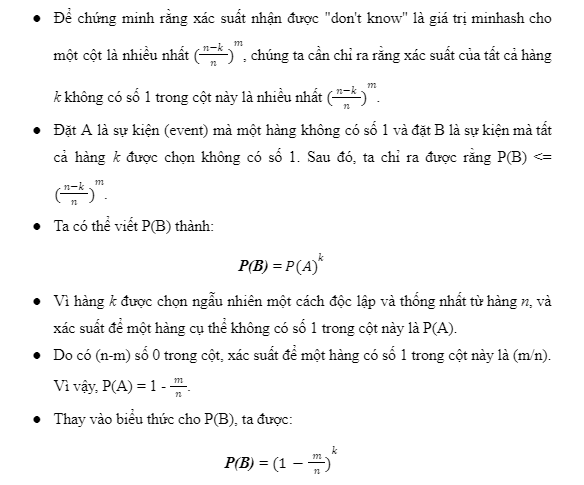


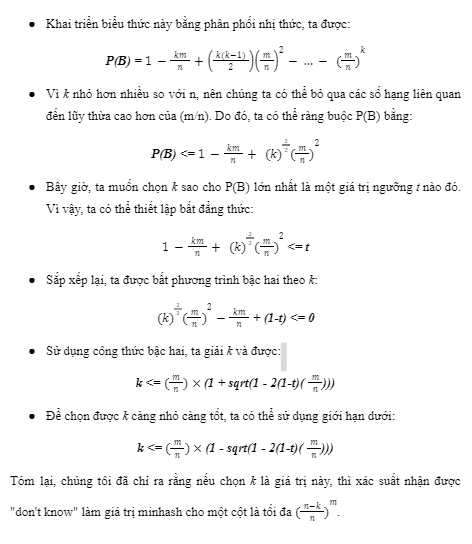

***b)*** 



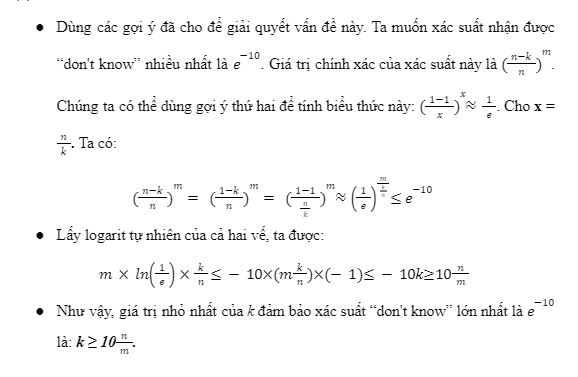

***c)*** Xét ma trận gồm 2 cột như sau:
Xét ma trận gồm 2 cột như sau:

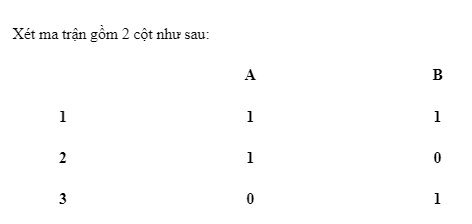

* Gọi S1 là tập {1, 2} và S2 là tập {1, 3}, tương ứng với cột thứ nhất và cột thứ hai.
* Giá trị Jaccard Similarity của S1 và S2 là |S1 ∩ S2| / |S1 ∪ S2| = 1/2.
* Để tính xác suất của một hoán vị tuần hoàn ngẫu nhiên mang lại cùng một giá trị minhash cho cả S1 và S2, ta cần tính toán giá trị Jaccard Similarity của mỗi cột cho tất cả các hoán vị tuần hoàn có thể có của các hàng. Lưu ý rằng chỉ có ba hoán vị tuần hoàn cho ma trận này vì n=3.
 * Đối với hoán vị đầu tiên (hàng 1, 2, 3), giá trị Jaccard Similarity của S1 là (1, 1) và của S2 là (1, 1).
 * Đối với hoán vị thứ 2 (hàng 2, 3, 1), giá trị Jaccard Similarity của S1 là (1, 1) và của S2 là (0, 1).
 * Đối với hoán vị thứ 3 (hàng 3, 1, 2), giá trị Jaccard Similarity của S1 là (1, 0) và của S2 là (1, 1).
* Do đó, xác suất để một hoán vị tuần hoàn ngẫu nhiên mang lại cùng một giá trị minhash cho cả S1 và S2 là 2/3, khác với giá trị Jaccard Similarity của chúng là 1/2. Do đó, chỉ hoán vị theo chu kỳ là không đủ để ước tính chính xác giá trị Jaccard Similarity trong trường hợp này.




# **CÂU 4:**

**a)** 

* Để chứng minh rằng thủ tục đã cho dẫn đến một câu trả lời đúng với xác suất không đổi, ta cần chỉ ra rằng xác suất thất bại bị giới hạn bởi một hằng số. Nói cách khác, ta cần chỉ ra rằng xác suất không tìm thấy (c, λ)-ANN khi có một trong tập dữ liệu nhiều nhất là một giá trị không đổi.
* Gọi T là tập hợp các điểm cách xa điểm truy vấn z hơn cλ, nghĩa là T={x∈ A|d(x, z)> cλ}. Chúng tôi muốn giới hạn xác suất rằng không có điểm nào được truy xuất từ các nhóm chứa a(c, λ)-ANN, tức là tất cả các điểm đã truy xuất đều nằm trong T hoặc xa hơn cλ tính từ z.
* Đặt Wj={x∈ A|gj(x) = gj(z)} là tập hợp các điểm băm vào cùng một nhóm với điểm truy vấn z trong hàm băm gj. Sau đó, xác suất để một điểm trong T được lấy từ một nhóm j cụ thể là:
 * Pr[x∈T∩Wj] ≤ Pr[d(x,z)>cλ] (theo định nghĩa của T)
 * ≤ Pr[d(x,z)/λ > c] (chia cả hai vế cho λ)
 * ≤ 1/c^α (sử dụng thuộc tính nhạy (λ, cλ, p1, p2) của hàm băm H với α=log(p1/p2))
* Do đó, xác suất để không có điểm nào được truy xuất từ nhóm j là a(c, λ)-ANN nhiều nhất là:
 * Pr[no (c,λ)-ANN in Wj] = Pr[T∩Wj] ≤ (1/c^α)
* Sử dụng ràng buộc liên kết, xác suất không có điểm nào trong số các điểm đã truy xuất từ tất cả các nhóm L là (c, λ)-ANN tối đa là:
 * Pr[no (c,λ)-ANN in any bucket] ≤ Pr[∪jT∩Wj] ≤ ΣjPr[T∩Wj] ≤ L/c^α
* Do đó, xác suất tìm thấy ít nhất một (c, λ)-ANN là:
 * Pr[finding (c,λ)-ANN] = 1 - Pr[no (c,λ)-ANN in any bucket] ≥ 1 - L/c^α
* Ta muốn chỉ ra rằng xác suất này bị giới hạn bởi một hằng số. Thay thế các giá trị của L và α, ta nhận được:
 * Pr[finding (c,λ)-ANN] ≥ 1 - L/c^α ≥ 1 - n^(ρ-α) ≥ 1 - n^(-log(p1/p2))
* Trong đó ta áp dụng ρ=log(1/p1)/log(1/p2) và L=n^ρ. Vì p1 và p2 là các hằng số nên xác suất tìm thấy a(c, λ)-ANN ít nhất là một giá trị không đổi nào đó.
* Cuối cùng, ta có thể viết lại bất đẳng thức trên dưới dạng:

 * Pr[finding (c,λ)-ANN] ≥ 1 – δ
Trong đó δ=n^(-log(p1/p2)) là một giá trị không đổi. Do đó, thủ tục đã cho dẫn đến một đáp án đúng với xác suất không đổi.








**b)**




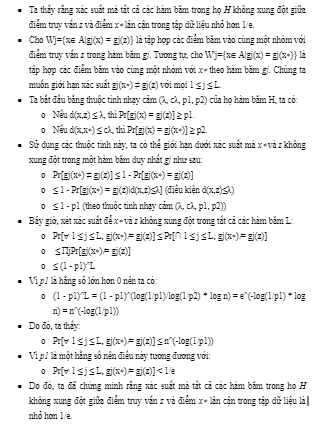

**c)**





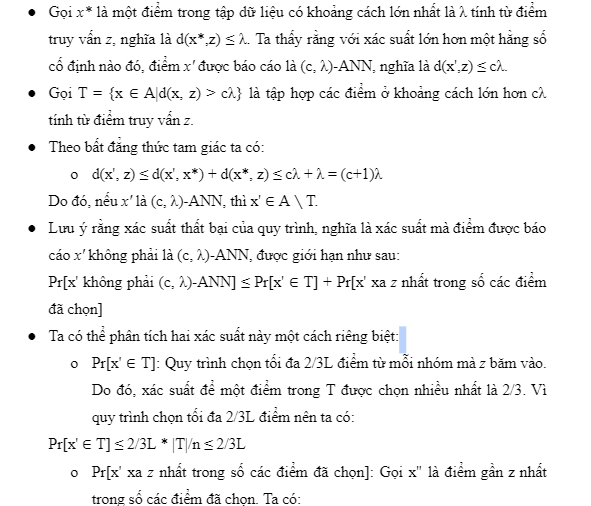

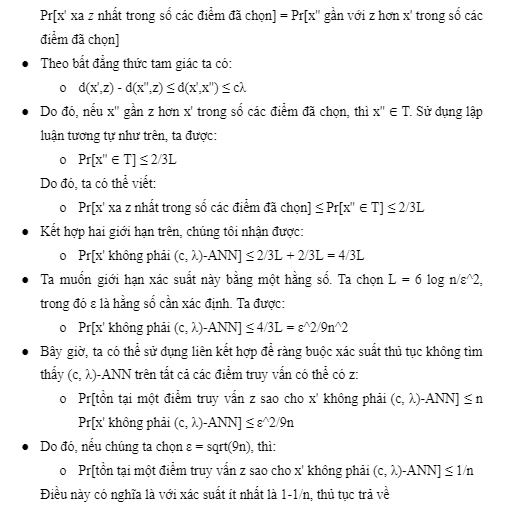